### Notebook to create netcdf files of wind forcing for the wind ensembles 

In [2]:
import sys
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as cmo
from datetime import datetime
import os
import xroms 

### Forcing will have the structure $\tau_x = A\sin(3\pi t)$

In [3]:
def make_oscillatory_zeros(ndays, dtw, wind_freq, u_amp, v_amp, output_path):
'''
Make alongshore wind stress in each cell with a period of 16 hours.
No prescribed across-shore wind stress
'''
    t = xr.DataArray(np.arange(0, ndays+dtw, dtw)[:-1], dims=['sms_time'])
    stu = np.sin(t*wind_freq*np.pi)*u_amp
    uwind_strs = xr.DataArray(np.insert(stu, 0, np.zeros(288))[:-288], dims=['sms_time']) #Start function after 4 days 
    vwind_strs = xr.DataArray((np.sin(t*wind_freq*np.pi)*v_amp), dims=['sms_time'])


    # Create dataset
    ds = xr.Dataset({'sms_time': t, 'sustr': uwind_strs, 'svstr': vwind_strs})

    ds.attrs['Description'] = 'Forcing for ideal shelf'
    ds.attrs['Author'] = 'Dylan Schlichting'
    ds.attrs['Created'] = datetime.now().isoformat()
    ds.attrs['type'] = 'ROMS FRC file'
    ds['sms_time'].attrs['units'] = 'days'
    ds['sustr'].attrs['units'] = 'Newton meter-2'
    ds['svstr'].attrs['units'] = 'Newton meter-2'

    # print('Writing netcdf FRC file: '+output_path)
    # Save dataset to a netcdf file  
    # ds.to_netcdf(output_path, mode = 'w')
    return ds 

In [17]:
ndays = 60 # 60 days
dtw = 1/72 
wind_freq = 3 #16 hours
u_amp = 0.1 # Base case - 0.Pa
v_amp = 0 # No across-shore wind stress
ds = make_oscillatory_zeros(ndays, dtw, wind_freq, u_amp, v_amp, _)

Text(0.5, 1.0, 'Surface wind stress')

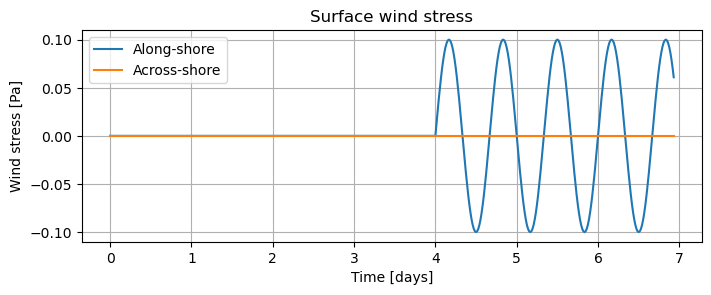

In [26]:
time = (ds.sms_time.values.astype(float))

fig, ax = plt.subplots(1,1, figsize = (8,2.75))

plt.plot(time[:500],ds.sustr[:500], label = 'Along-shore')
plt.plot(time[:500],ds.svstr[:500], label = 'Across-shore')
plt.xlabel('Time [days]')
plt.ylabel('Wind stress [Pa]')
plt.legend()
plt.grid(which = 'both')
plt.title('Surface wind stress')

In [25]:
print(ds.sustr[:500].max().values)
print(ds.sustr[:500].min().values)

0.1
-0.1


### Add in vertical lines every 16 hours. Find the indices first 

In [36]:
print(time[72])
print(16/24)
print(time[48])
#Print the time every inertial period
print(time[::48])

1.0
0.6666666666666666
0.6666666666666666


In [43]:
time[:700][::48]

array([0.        , 0.66666667, 1.33333333, 2.        , 2.66666667,
       3.33333333, 4.        , 4.66666667, 5.33333333, 6.        ,
       6.66666667, 7.33333333, 8.        , 8.66666667, 9.33333333])

Text(0.5, 1.0, 'Surface wind stress')

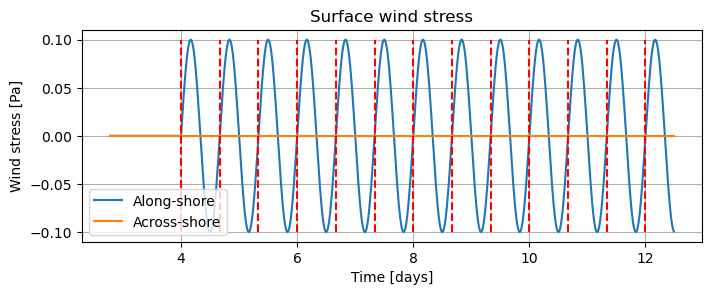

In [52]:
time = (ds.sms_time.values.astype(float))

fig, ax = plt.subplots(1,1, figsize = (8,2.75))

plt.plot(time[200:900],ds.sustr[200:900], label = 'Along-shore')
plt.plot(time[200:900],ds.svstr[200:900], label = 'Across-shore')
plt.vlines(x = time[288:900][::48], ymin = -0.1, ymax = 0.1, colors = 'r', ls = '--')
plt.xlabel('Time [days]')
plt.ylabel('Wind stress [Pa]')
plt.legend()
plt.grid(which = 'both')
plt.title('Surface wind stress')

### Good, everyting looks as it should. This function can now easily be generalized for the wind ensemble runs. 
Last thing - calculate the wind period relative to the inertial period

In [59]:
f = 1e-4 #per seconds
Ts = (2*np.pi)/f
Tdays = Ts/86400
Thours = Tdays*24
print(Thours)
print(16/Thours)

17.453292519943293
0.9167324722093173
